# Airbnb Madrid Statistical Analysis

Analysis of Airbnb listings in Madrid to understand pricing patterns and factors influencing price per guest.

**Data files:** Assumed in `data/` folder

## Imports and Setup

In [13]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional visualizations
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

os.makedirs("output", exist_ok=True)

## Data Loading

In [14]:
# Load all Airbnb Madrid datasets (property details, conditions, location, reviews, host info)
property = pd.read_csv("data/airbnb_madrid_property.csv")
conditions = pd.read_csv("data/airbnb_madrid_conditions.csv")
location = pd.read_csv("data/airbnb_madrid_location.csv")
reviews = pd.read_csv("data/airbnb_madrid_reviews.csv")
host = pd.read_csv("data/airbnb_madrid_host.csv")

# Merge all datasets on listing ID to create unified dataset
df = property.merge(conditions, on="id").merge(location, on="id")\
        .merge(reviews, on="id").merge(host, on="id")

## Data Preparation & Feature Engineering

In [15]:
# Price per guest: key metric for comparing listings across different sizes
df["price_per_guest"] = df["price"] / df["accommodates"]

# Filter to top 10 neighborhoods by listing count for focused analysis
top_neighbourhoods = df["neighbourhood"].value_counts().head(10).index
df_top = df[df["neighbourhood"].isin(top_neighbourhoods)]

## Visualizations

### 1. Median Price per Guest by Top Neighborhoods

**Business insight:** Identify which popular neighborhoods offer better value

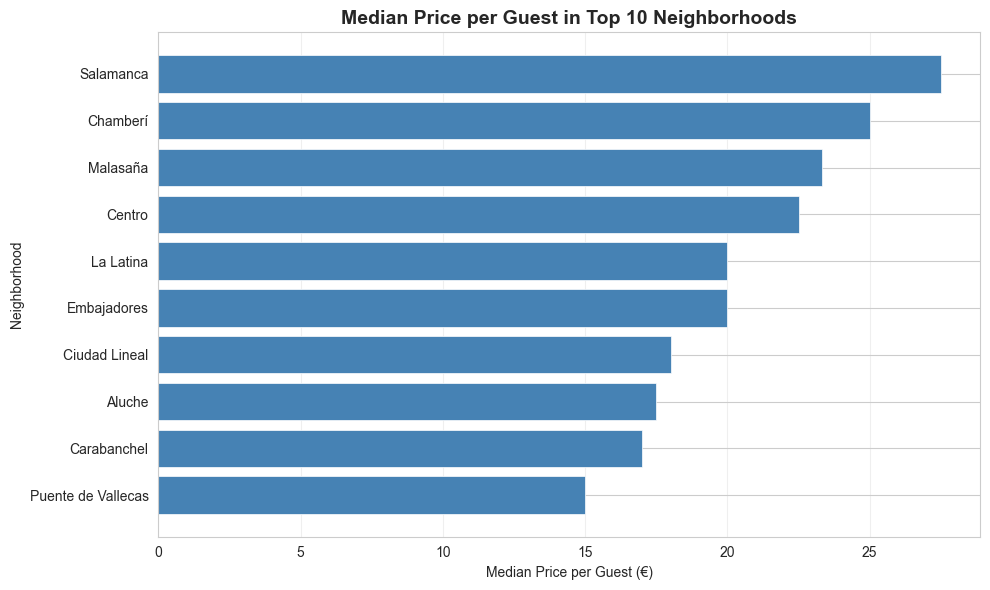

In [16]:
median_prices_df = df_top.groupby("neighbourhood", as_index=False)["price_per_guest"].median()
median_prices_df = median_prices_df.sort_values("price_per_guest", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(median_prices_df["neighbourhood"], median_prices_df["price_per_guest"], color="steelblue", edgecolor="white", linewidth=0.5)
plt.title("Median Price per Guest in Top 10 Neighborhoods", fontsize=14, fontweight="bold")
plt.xlabel("Median Price per Guest (€)")
plt.ylabel("Neighborhood")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_neighborhood.png", dpi=150, bbox_inches="tight")
plt.show()

### 2. Distribution of Price per Guest

**Business insight:** Understand the price distribution to identify market segments

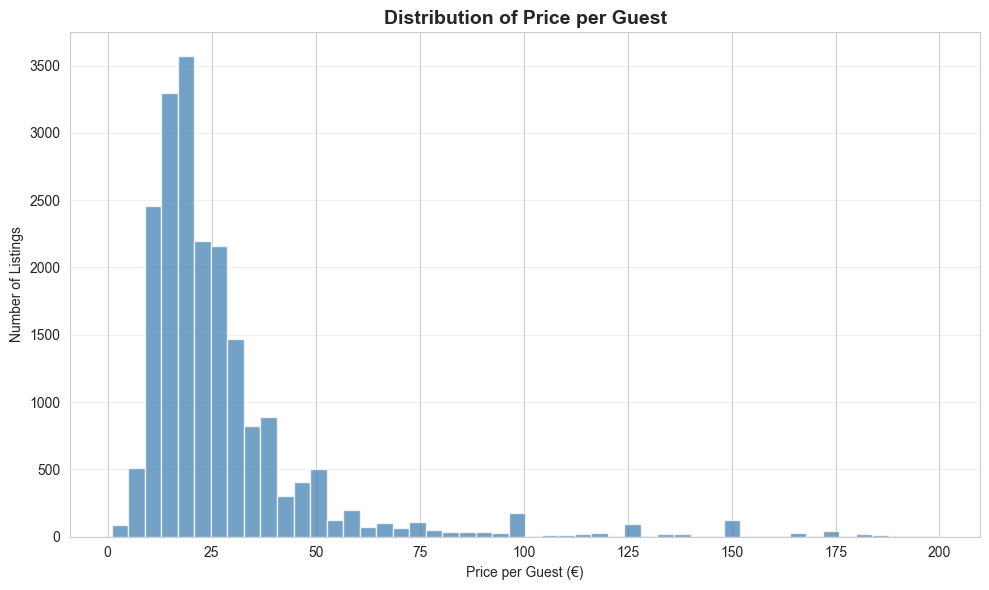

In [17]:
df_filtered = df[df["price_per_guest"] < 200]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered["price_per_guest"], bins=50, color="steelblue", edgecolor="white", alpha=0.75)
plt.title("Distribution of Price per Guest", fontsize=14, fontweight="bold")
plt.xlabel("Price per Guest (€)")
plt.ylabel("Number of Listings")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

### 3. Price per Guest by WiFi Availability

**Business insight:** Assess if WiFi (basic amenity) impacts pricing

/var/folders/v1/l1wd4z6509jdtvbxfqdgyp9m0000gn/T/ipykernel_77408/2553219019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="amenities_wifi_internet", y="price_per_guest", palette="Set2")


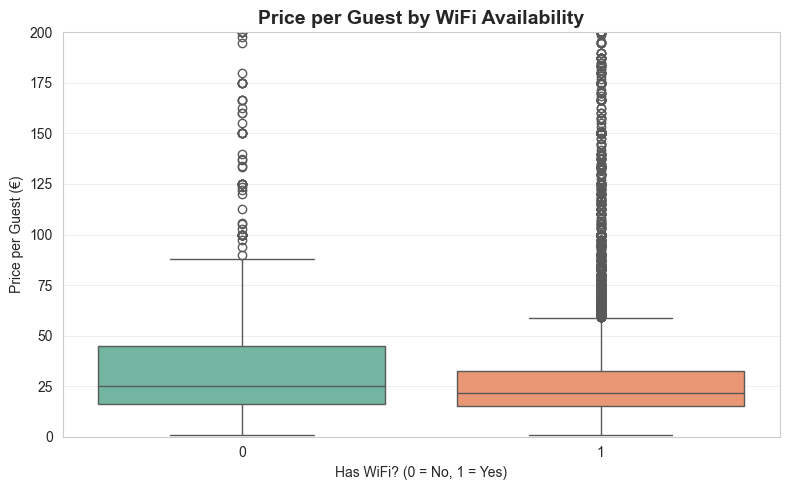

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="amenities_wifi_internet", y="price_per_guest", hue="amenities_wifi_internet", palette="Set2", legend=False)
plt.title("Price per Guest by WiFi Availability", fontsize=14, fontweight="bold")
plt.xlabel("Has WiFi? (0 = No, 1 = Yes)")
plt.ylabel("Price per Guest (€)")
plt.ylim(0, 200)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_wifi.png", dpi=150, bbox_inches="tight")
plt.show()

### 4. Price per Guest by Superhost Status

**Business insight:** Evaluate premium pricing potential for verified hosts

/var/folders/v1/l1wd4z6509jdtvbxfqdgyp9m0000gn/T/ipykernel_77408/662336122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="host_is_superhost", y="price_per_guest", palette="Set2")


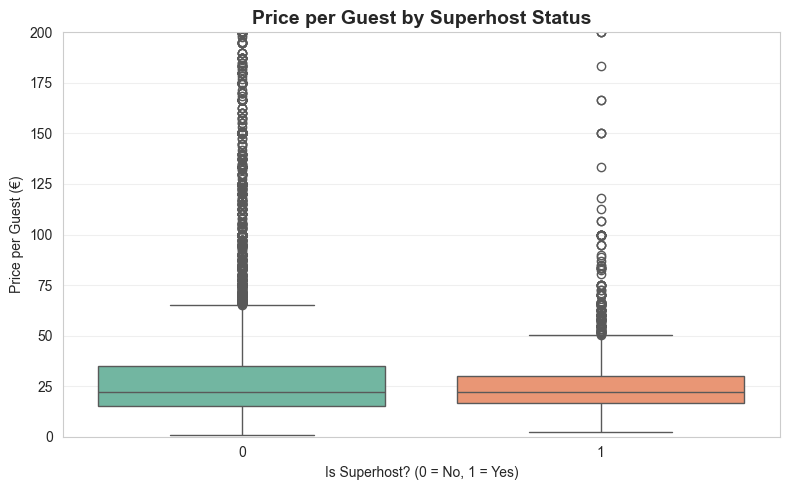

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="host_is_superhost", y="price_per_guest", hue="host_is_superhost", palette="Set2", legend=False)
plt.title("Price per Guest by Superhost Status", fontsize=14, fontweight="bold")
plt.xlabel("Is Superhost? (0 = No, 1 = Yes)")
plt.ylabel("Price per Guest (€)")
plt.ylim(0, 200)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_superhost.png", dpi=150, bbox_inches="tight")
plt.show()

### 5. Price per Guest by Air Conditioning Availability

**Business insight:** Premium amenity impact on pricing (especially relevant for Madrid summers)

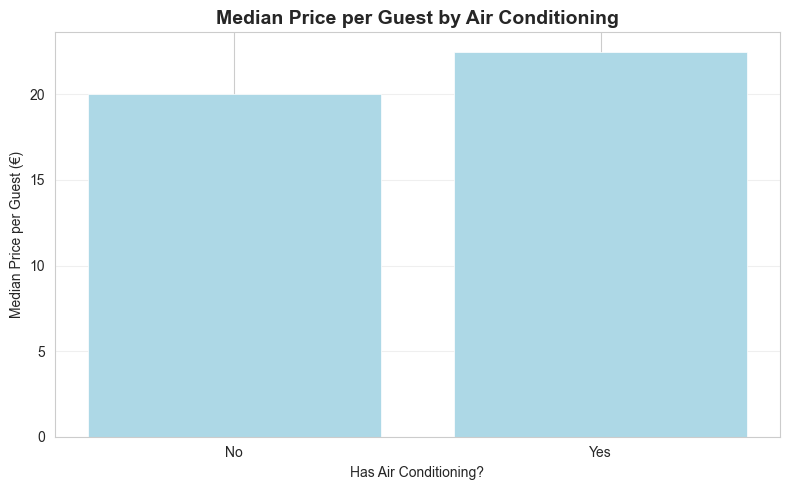

In [20]:
ac_median = df.groupby("amenities_air_conditioning", as_index=False)["price_per_guest"].median()
ac_median["amenities_air_conditioning"] = ac_median["amenities_air_conditioning"].map({0: "No", 1: "Yes"})

plt.figure(figsize=(8, 5))
plt.bar(ac_median["amenities_air_conditioning"], ac_median["price_per_guest"], color="lightblue", edgecolor="white", linewidth=0.5)
plt.title("Median Price per Guest by Air Conditioning", fontsize=14, fontweight="bold")
plt.xlabel("Has Air Conditioning?")
plt.ylabel("Median Price per Guest (€)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_ac.png", dpi=150, bbox_inches="tight")
plt.show()

### 6. Price per Guest by Distance to City Center (Puerta del Sol)

**Business insight:** Location premium — how distance from center affects pricing

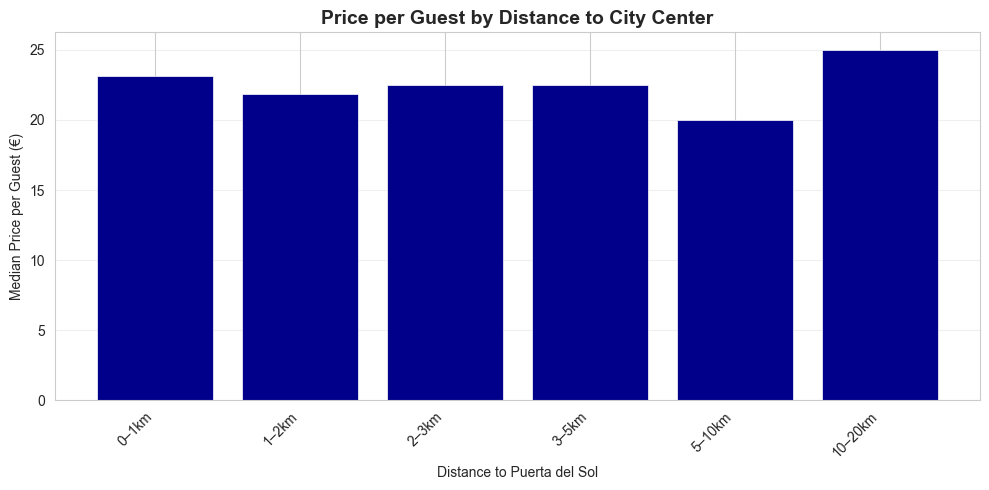

In [21]:
df["distancia_categoria"] = pd.cut(
    df["dist_km_sol"],
    bins=[0, 1, 2, 3, 5, 10, 20],
    labels=["0–1km", "1–2km", "2–3km", "3–5km", "5–10km", "10–20km"]
)
dist_tramos = df.groupby("distancia_categoria", as_index=False, observed=True)["price_per_guest"].median()

plt.figure(figsize=(10, 5))
plt.bar(dist_tramos["distancia_categoria"], dist_tramos["price_per_guest"], color="darkblue", edgecolor="white", linewidth=0.5)
plt.title("Price per Guest by Distance to City Center", fontsize=14, fontweight="bold")
plt.xlabel("Distance to Puerta del Sol")
plt.ylabel("Median Price per Guest (€)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_center_distance.png", dpi=150, bbox_inches="tight")
plt.show()

### 7. Relationship Between Review Rating and Price per Guest

**Business insight:** Quality-price correlation — do higher ratings justify premium pricing?

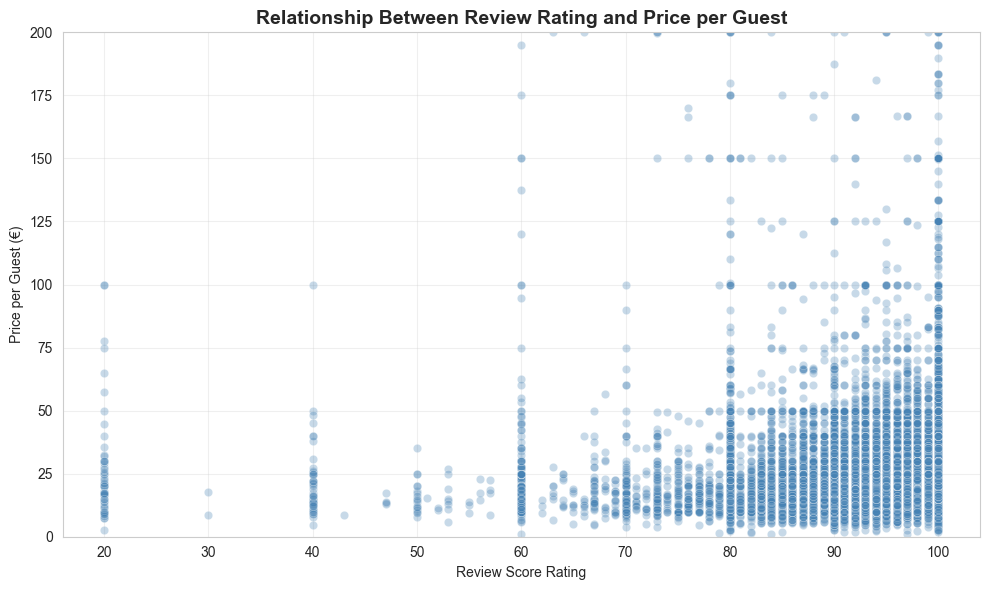

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="review_scores_rating", y="price_per_guest", alpha=0.3, color="steelblue")
plt.title("Relationship Between Review Rating and Price per Guest", fontsize=14, fontweight="bold")
plt.xlabel("Review Score Rating")
plt.ylabel("Price per Guest (€)")
plt.ylim(0, 200)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_rating_scatter.png", dpi=150, bbox_inches="tight")
plt.show()

### 8. Price per Guest by Review Rating Categories

**Business insight:** Price premium by quality tiers — segmented view of rating impact

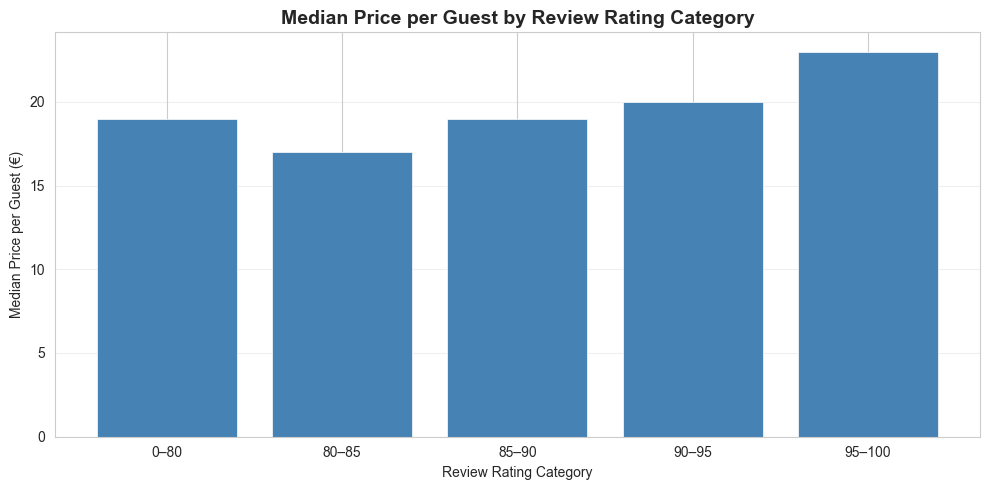

In [23]:
df["rating_categoria"] = pd.cut(
    df["review_scores_rating"],
    bins=[0, 80, 85, 90, 95, 100],
    labels=["0–80", "80–85", "85–90", "90–95", "95–100"]
)
rating_median = df.groupby("rating_categoria", as_index=False, observed=True)["price_per_guest"].median()

plt.figure(figsize=(10, 5))
plt.bar(rating_median["rating_categoria"], rating_median["price_per_guest"], color="steelblue", edgecolor="white", linewidth=0.5)
plt.title("Median Price per Guest by Review Rating Category", fontsize=14, fontweight="bold")
plt.xlabel("Review Rating Category")
plt.ylabel("Median Price per Guest (€)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_rating_category.png", dpi=150, bbox_inches="tight")
plt.show()

### 9. Price per Guest by Distance to Airport

**Business insight:** Airport proximity premium — convenience factor for travelers

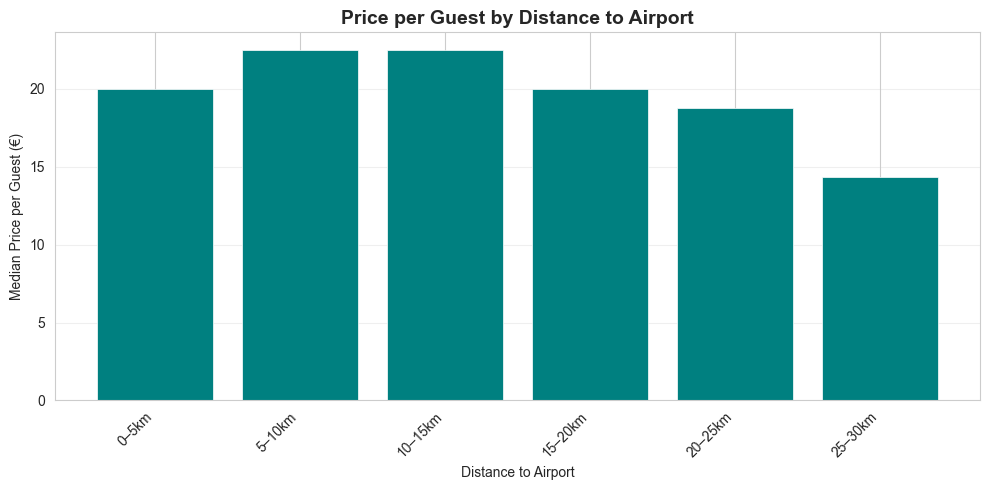

In [24]:
df["dist_aeropuerto_categoria"] = pd.cut(
    df["dist_km_airport"],
    bins=[0, 5, 10, 15, 20, 25, 30],
    labels=["0–5km", "5–10km", "10–15km", "15–20km", "20–25km", "25–30km"]
)
airport_dist_median = df.groupby("dist_aeropuerto_categoria", as_index=False, observed=True)["price_per_guest"].median()

plt.figure(figsize=(10, 5))
plt.bar(airport_dist_median["dist_aeropuerto_categoria"], airport_dist_median["price_per_guest"], color="teal", edgecolor="white", linewidth=0.5)
plt.title("Price per Guest by Distance to Airport", fontsize=14, fontweight="bold")
plt.xlabel("Distance to Airport")
plt.ylabel("Median Price per Guest (€)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("output/price_by_airport_distance.png", dpi=150, bbox_inches="tight")
plt.show()